Analysis for npc patient




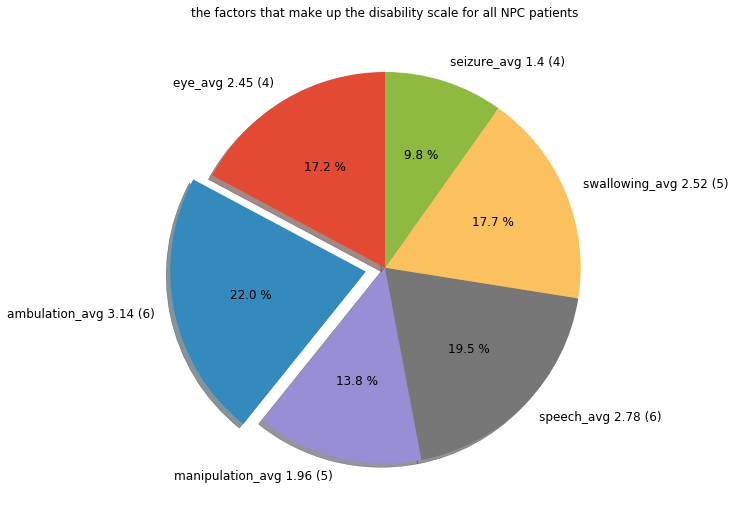

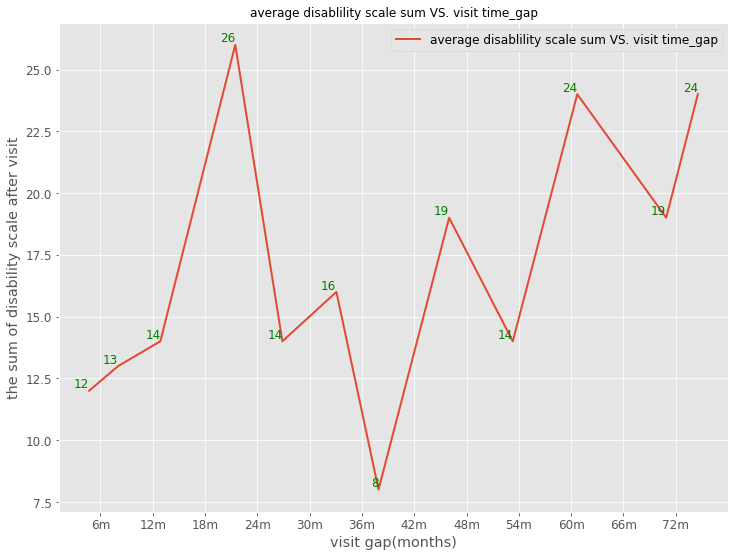

No handles with labels found to put in legend.


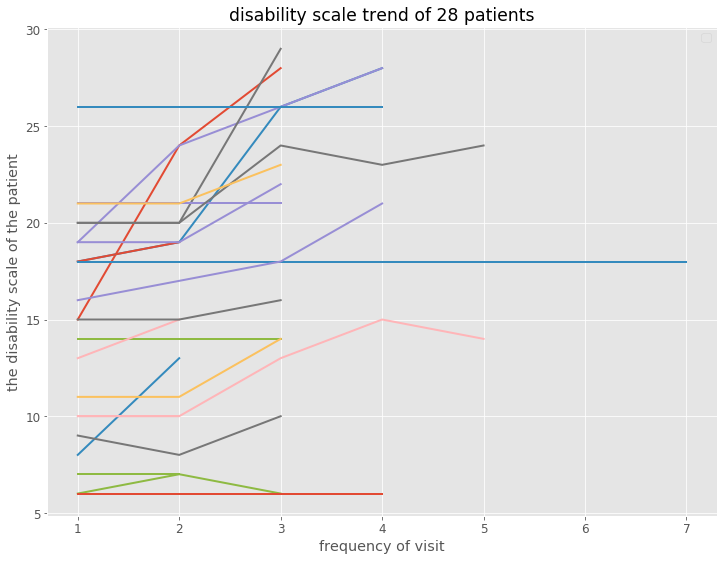

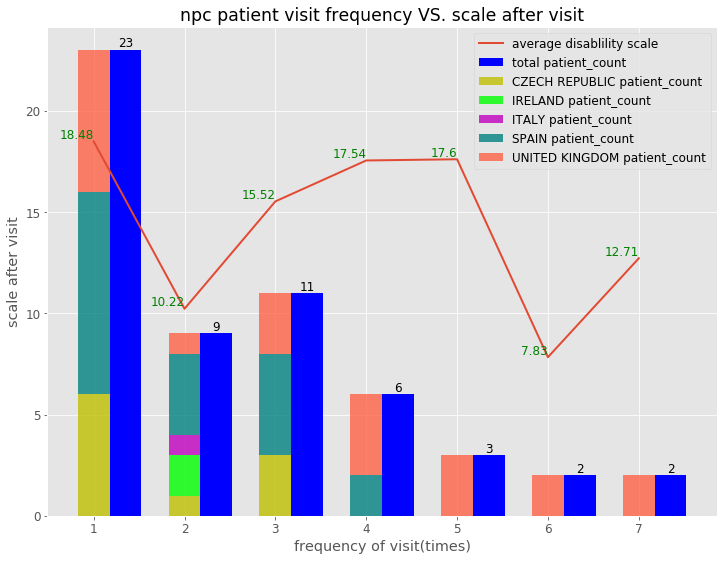

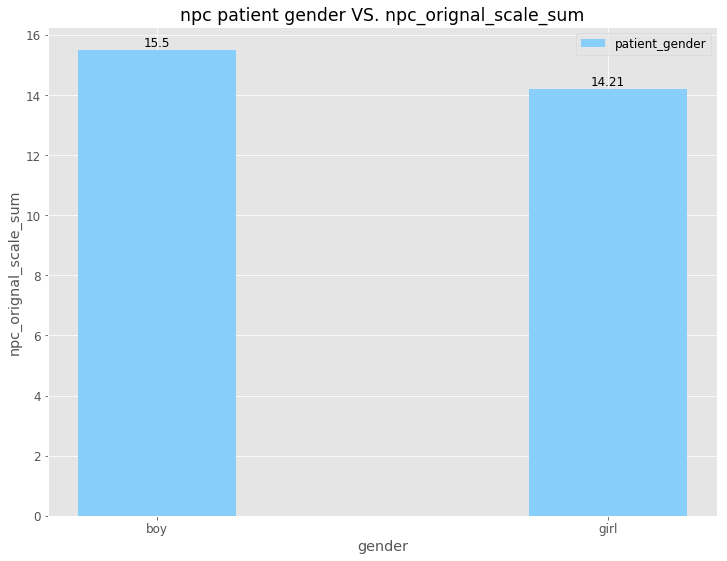

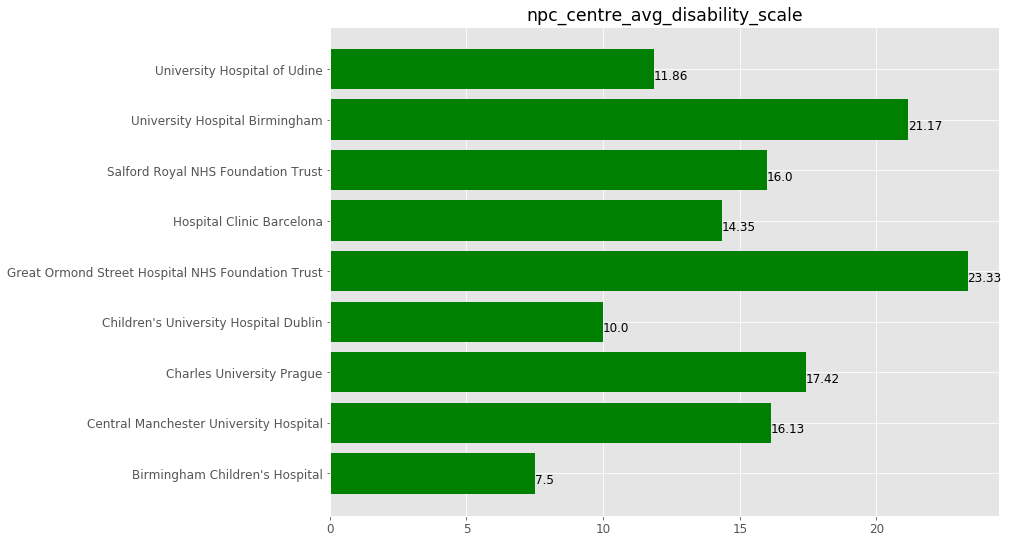

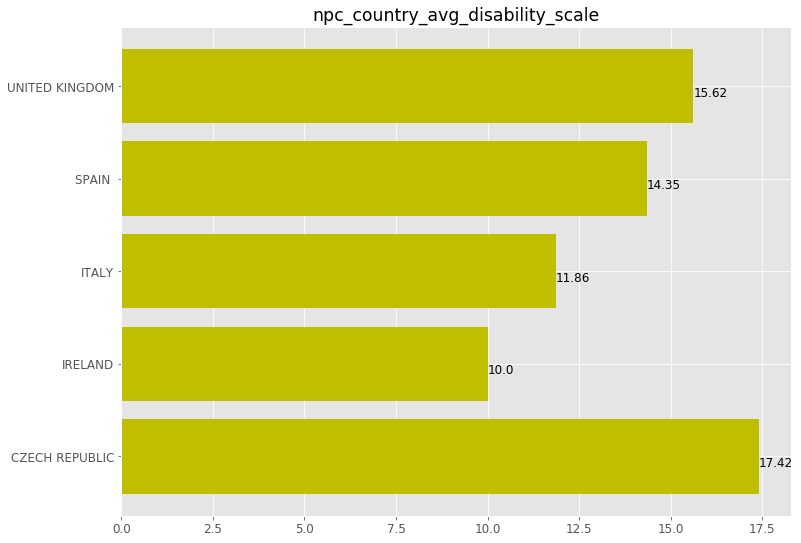

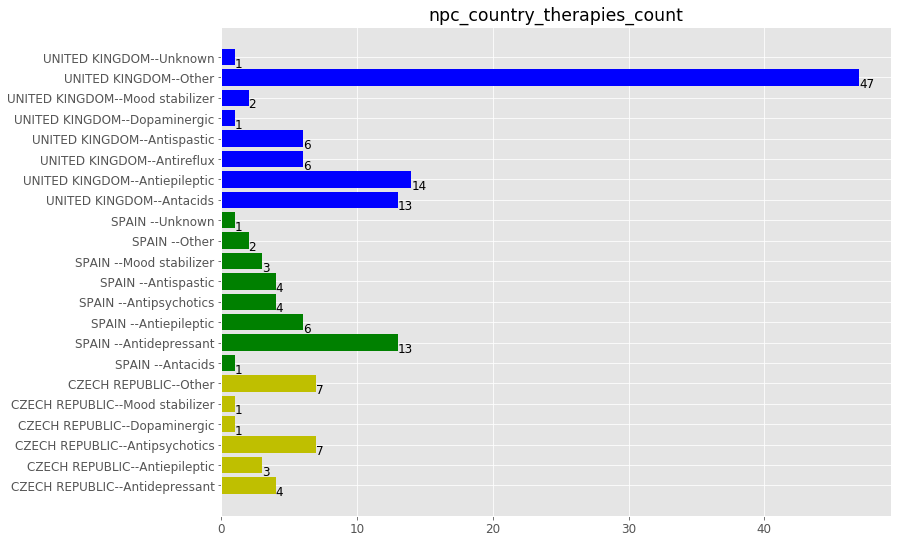

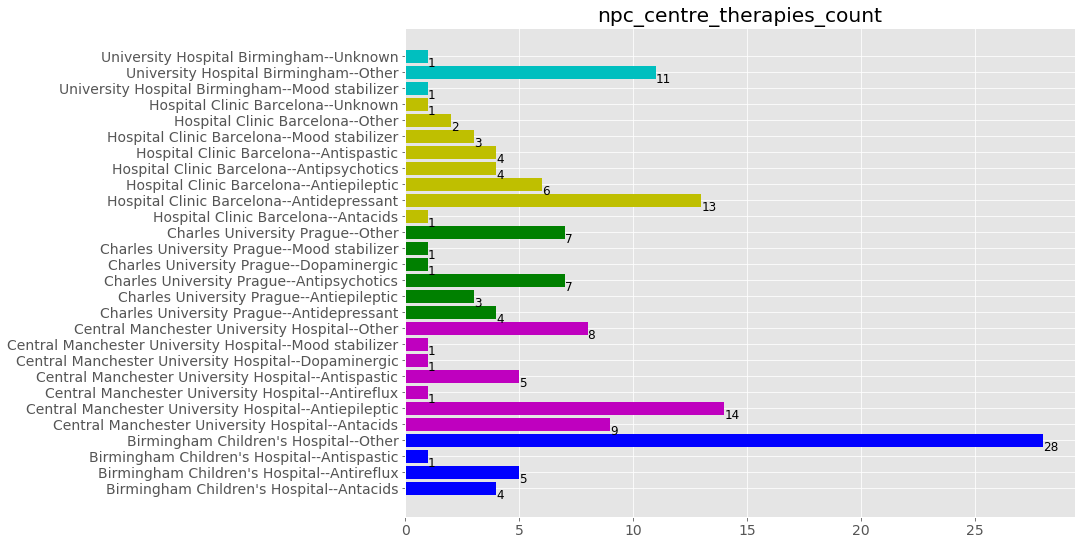

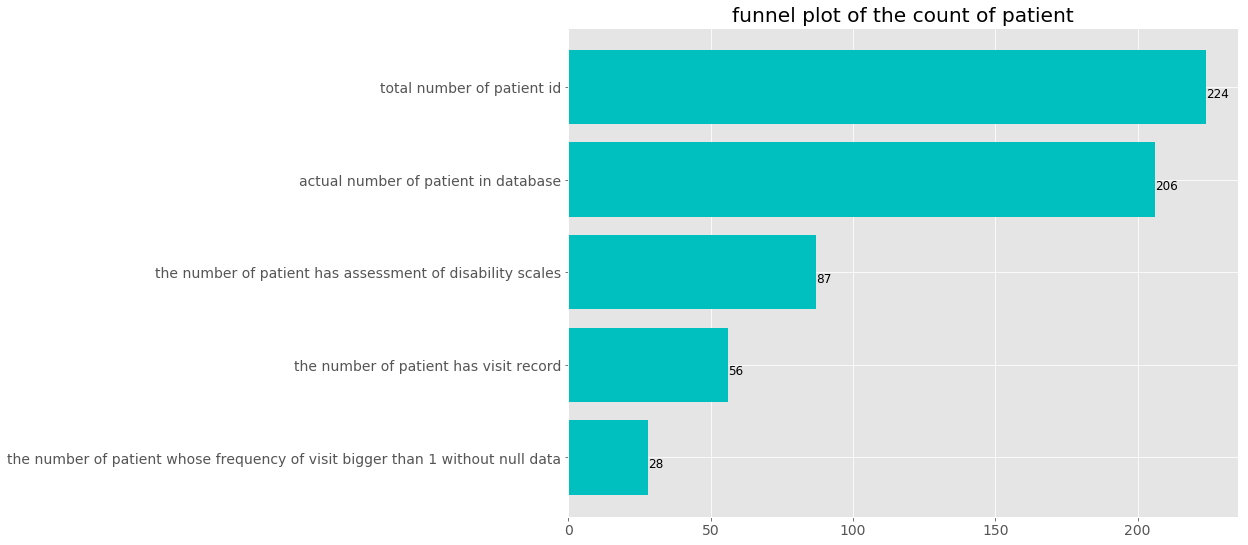


Analysis for npb patient




/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/axes/_base.py:3604: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/axes/_base.py:3610: MatplotlibDeprecationWarning: 
The `ymax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `top` instead.
  alternative='`top`', obj_type='argument')


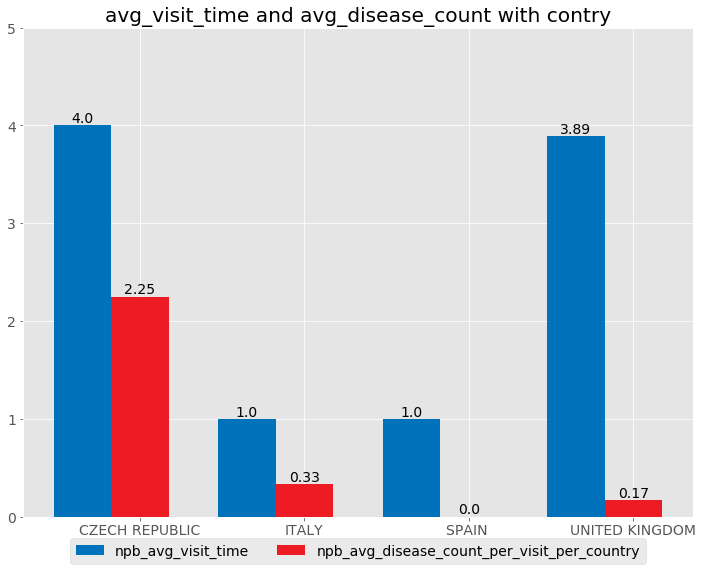

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/axes/_base.py:3215: MatplotlibDeprecationWarning: 
The `xmin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `left` instead.
  alternative='`left`', obj_type='argument')
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/axes/_base.py:3221: MatplotlibDeprecationWarning: 
The `xmax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `right` instead.
  alternative='`right`', obj_type='argument')


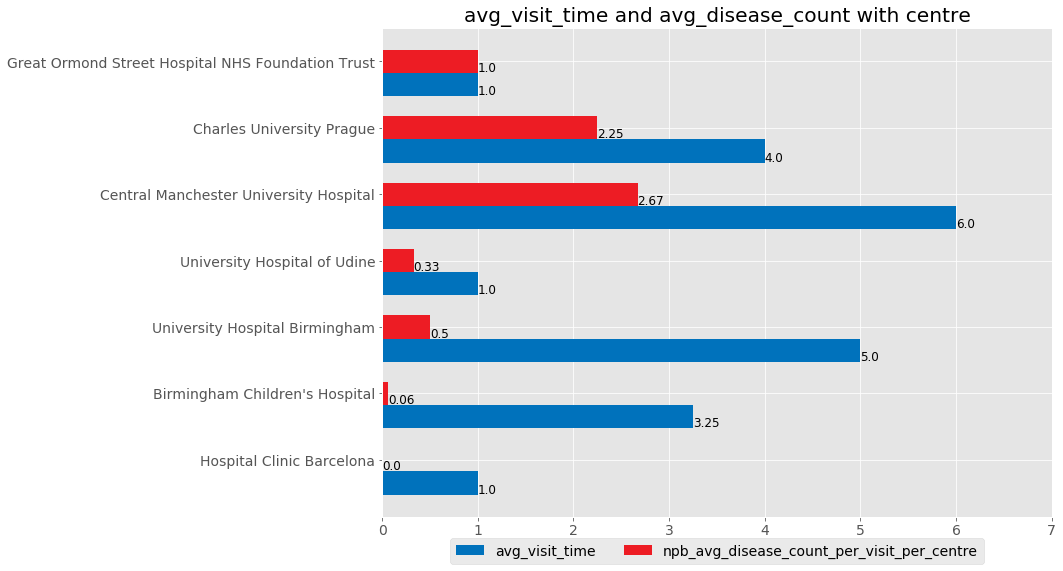

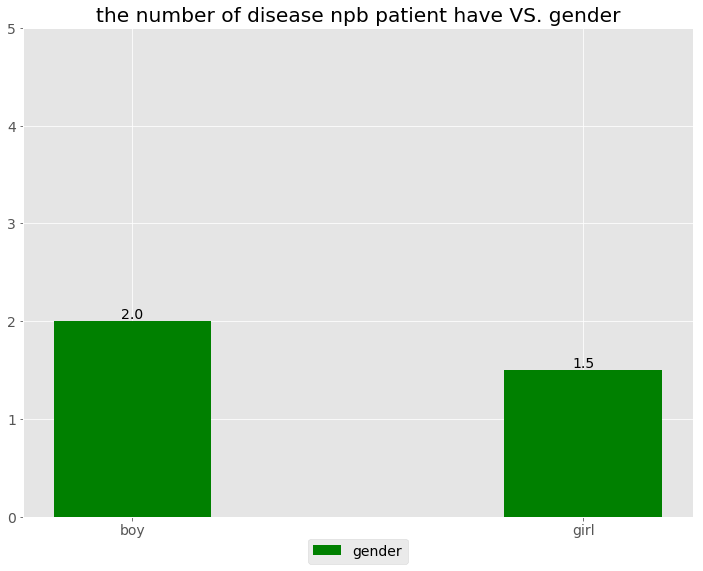

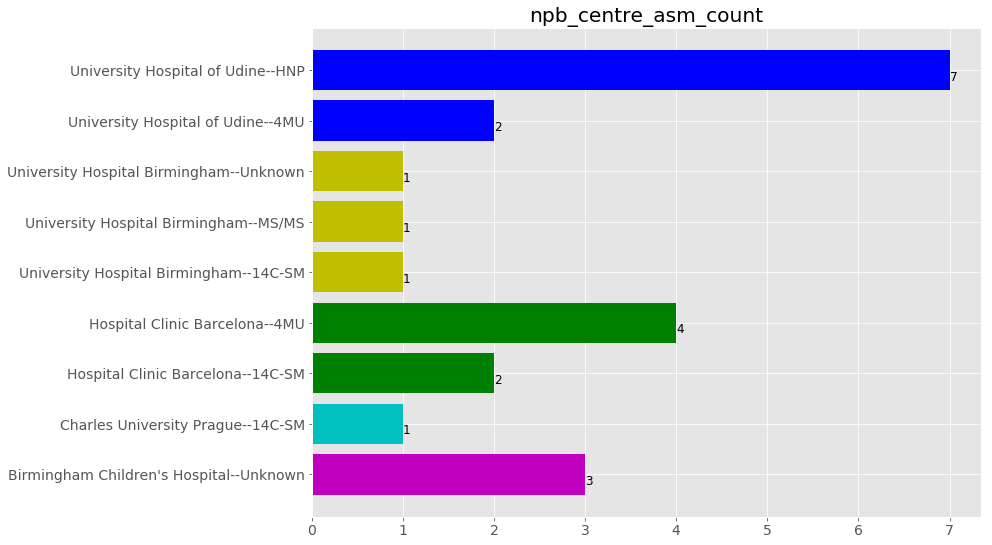

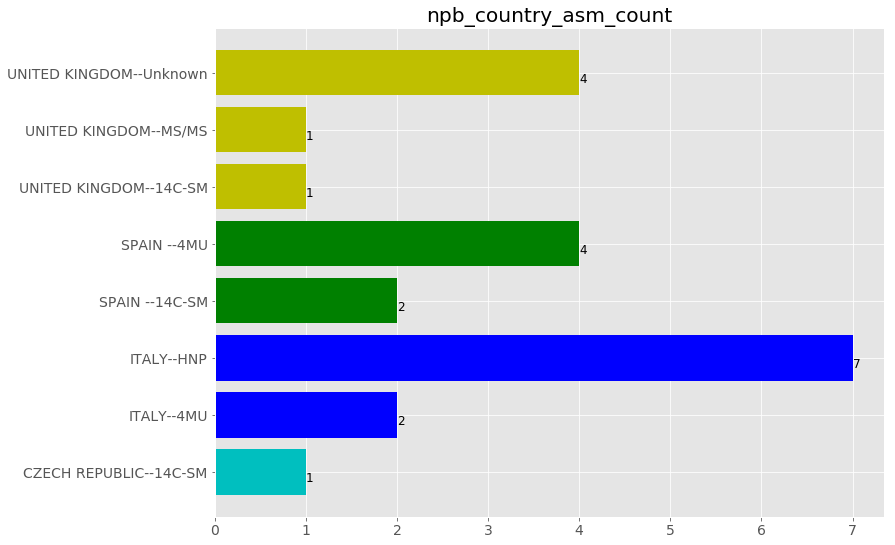

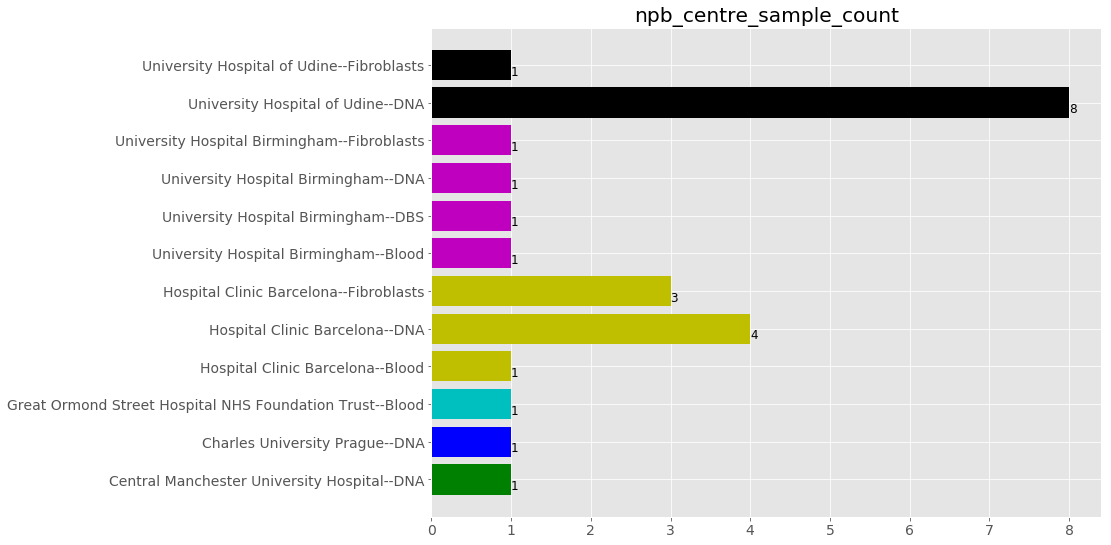

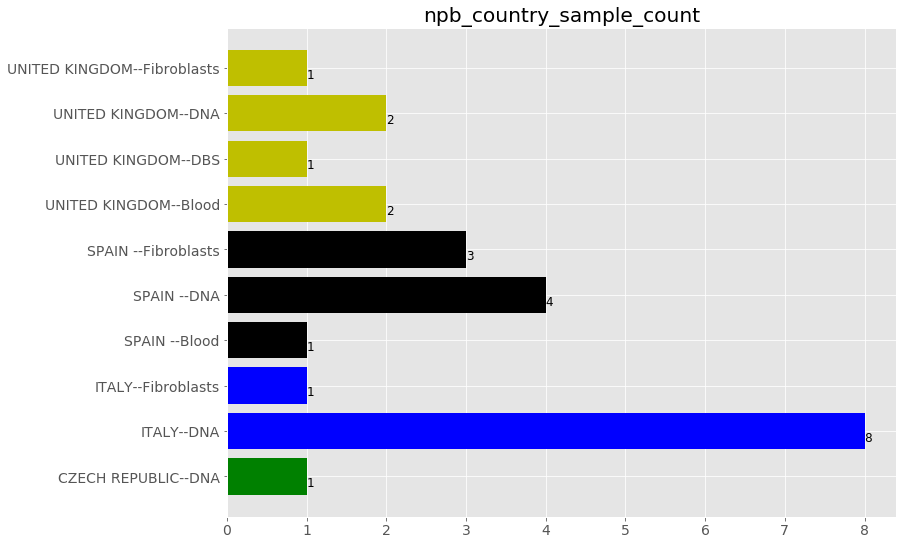

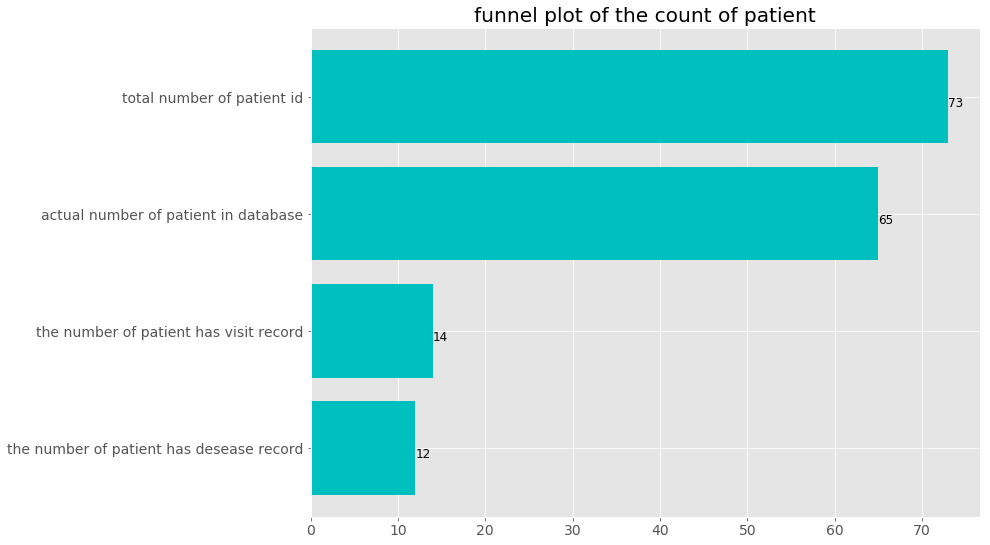

In [81]:
#!/usr/bin/python3
import matplotlib.pyplot as plt 
import pymysql
import numpy as np
import math
plt.style.use('ggplot')
# connect the database
db = pymysql.connect('localhost','root','Yachne929','inpdr', )
 
# create cursor
cursor = db.cursor()
 
# use execute() executes SQL
cursor.execute("SELECT VERSION()")
sql1 = 'select @@sql_mode;'
sql2 = 'SET sql_mode="STRICT_TRANS_TABLES,NO_ZERO_IN_DATE,NO_ZERO_DATE,ERROR_FOR_DIVISION_BY_ZERO,NO_AUTO_CREATE_USER,NO_ENGINE_SUBSTITUTION";'
try:
   # excute sql query
   cursor.execute(sql1)

   # commit
   db.commit()
   results1 = cursor.fetchall()
   cursor.execute(sql2)
   db.commit()
   data = cursor.fetchall()
   #print(data)
    
except:
   # handle the exception, if have error, do rollback
   db.rollback()
#store the sql results 
data= pd.read_sql("select npc_patient.gender, npc_visit.patient_id,npc_visit_counter.counter,ifnull(TIMESTAMPDIFF(DAY, npc_visit.visit_date, (SELECT t2.visit_date  FROM npc_visit AS t2 WHERE t2.patient_id = npc_visit.patient_id AND t2.visit_date  > npc_visit.visit_date ORDER BY t2.visit_date LIMIT 1) ), -100) as time_gap ,npc_visit.visit_date, ifnull((ifnull(npc_visit.ambulation_scale_id,0)+ifnull(npc_visit.manipulation_scale_id,0)+ifnull(npc_visit.speech_scale_id,0)+ifnull(npc_visit.swallowing_scale_id,0)+ifnull(npc_visit.eye_scale_id,0)+ifnull(npc_visit.seizure_scale_id,0)),-1) as after_visit_scale_sum,npc_visit.ambulation_scale_id,npc_visit.manipulation_scale_id,npc_visit.speech_scale_id,npc_visit.swallowing_scale_id,npc_visit.eye_scale_id,npc_visit.seizure_scale_id,ifnull((SELECT (ifnull(t3.ambulation_scale_id,0)+ifnull(t3.manipulation_scale_id,0)+ifnull(t3.speech_scale_id,0)+ifnull(t3.swallowing_scale_id,0)+ifnull(t3.eye_scale_id,0)+ifnull(t3.seizure_scale_id,0)) as after_visit_scale_sum FROM npc_visit AS t3 WHERE t3.patient_id = npc_visit.patient_id AND t3.visit_date > npc_visit.visit_date ORDER BY t3.visit_date LIMIT 1) -  sum(ifnull(npc_visit.ambulation_scale_id,0)+ifnull(npc_visit.manipulation_scale_id,0)+ifnull(npc_visit.speech_scale_id,0)+ifnull(npc_visit.swallowing_scale_id,0)+ifnull(npc_visit.eye_scale_id,0)+ifnull(npc_visit.seizure_scale_id,0)), -10) as scale_gap from npc_visit join npc_visit_counter on npc_visit.patient_id = npc_visit_counter.patient_id join npc_patient on npc_visit.patient_id = npc_patient.id group by npc_visit.id;",con=db)
data2 = pd.read_sql("select npc_visit_counter.counter, count(npc_visit_counter.counter) as num_count from npc_visit_counter group by npc_visit_counter.counter;",con=db)
data3 = pd.read_sql("select centre_name,round(sum(scale_sum)/count(centre_name),2)as centre_avg_disability from (select (ifnull(npc_severity_assessment.ambulation_scale_id,0)+ifnull(npc_severity_assessment.manipulation_scale_id,0)+ifnull(npc_severity_assessment.speech_scale_id,0)+ifnull(npc_severity_assessment.swallowing_scale_id,0)+ifnull(npc_severity_assessment.eye_scale_id,0)+ifnull(npc_severity_assessment.seizure_scale_id,0)) as scale_sum, npd_centre.name as centre_name, npd_city.name as city_name, npd_country.name as country_name from npc_severity_assessment  join npc_patient on npc_patient.id = npc_severity_assessment.patient_id join npd_centre on npc_patient.centre_id = npd_centre.id join npd_city on npd_centre.city_id = npd_city.id join npd_country on npd_country.id = npd_city.country_id group by npc_patient.id) as t3 group by centre_name;",con=db)
data4 = pd.read_sql("select (ifnull(npc_severity_assessment.ambulation_scale_id,0)+ifnull(npc_severity_assessment.manipulation_scale_id,0)+ifnull(npc_severity_assessment.speech_scale_id,0)+ifnull(npc_severity_assessment.swallowing_scale_id,0)+ifnull(npc_severity_assessment.eye_scale_id,0)+ifnull(npc_severity_assessment.seizure_scale_id,0)) as scale_sum, npc_patient.gender from npc_patient join npc_severity_assessment on npc_severity_assessment.patient_id = npc_patient.id;",con=db)
data5 = pd.read_sql("select country_name,round(sum(scale_sum)/count(country_name),2)as country_avg_disability from (select (ifnull(npc_severity_assessment.ambulation_scale_id,0)+ifnull(npc_severity_assessment.manipulation_scale_id,0)+ifnull(npc_severity_assessment.speech_scale_id,0)+ifnull(npc_severity_assessment.swallowing_scale_id,0)+ifnull(npc_severity_assessment.eye_scale_id,0)+ifnull(npc_severity_assessment.seizure_scale_id,0)) as scale_sum, npd_centre.name as centre_name, npd_city.name as city_name, npd_country.name as country_name from npc_severity_assessment  join npc_patient on npc_patient.id = npc_severity_assessment.patient_id join npd_centre on npc_patient.centre_id = npd_centre.id join npd_city on npd_centre.city_id = npd_city.id join npd_country on npd_country.id = npd_city.country_id group by npc_patient.id) as t3 group by country_name;",con=db)
data6 = pd.read_sql("select country_name, symptomatic_therapies_name,count(1) as country_therapies_count from (select symptomatic_therapies.name as symptomatic_therapies_name,npd_centre.name as centre_name, npd_city.name as city_name, npd_country.name as country_name from symptomatic_therapies  join npc_visit_symptomatic_therapies on npc_visit_symptomatic_therapies.symptomatic_therapies_id = symptomatic_therapies.id join npc_visit on npc_visit_symptomatic_therapies.npc_visit_id = npc_visit.id join npc_patient on npc_patient.id = npc_visit.patient_id join npd_centre on npc_patient.centre_id = npd_centre.id join npd_city on npd_centre.city_id = npd_city.id join npd_country on npd_country.id = npd_city.country_id) as t3 group by country_name,symptomatic_therapies_name;",con = db)
data7 = pd.read_sql("select centre_name, symptomatic_therapies_name,count(1) as centre_therapies_count from (select symptomatic_therapies.name as symptomatic_therapies_name,npd_centre.name as centre_name, npd_city.name as city_name, npd_country.name as country_name from symptomatic_therapies  join npc_visit_symptomatic_therapies on npc_visit_symptomatic_therapies.symptomatic_therapies_id = symptomatic_therapies.id join npc_visit on npc_visit_symptomatic_therapies.npc_visit_id = npc_visit.id join npc_patient on npc_patient.id = npc_visit.patient_id join npd_centre on npc_patient.centre_id = npd_centre.id join npd_city on npd_centre.city_id = npd_city.id join npd_country on npd_country.id = npd_city.country_id) as t3 group by centre_name,symptomatic_therapies_name;",con = db)
data8 = pd.read_sql("select tb5.visit_id,tb5.patient_id, count(tb5.patient_id) as visit_times,round(sum(ifnull(tb5.bleeding_id/tb5.bleeding_id,0)+ifnull(tb5.cardiovascular_disease_id/tb5.cardiovascular_disease_id,0)+ifnull(tb5.chronic_pain_id/tb5.chronic_pain_id,0)+ifnull(tb5.neurological_abnor_id/tb5.neurological_abnor_id,0)+ifnull(tb5.npb_other_illness_id/tb5.npb_other_illness_id,0)+ifnull(npb_visit_psychiatric_manifestations.psychiatric_manifestations_id/npb_visit_psychiatric_manifestations.psychiatric_manifestations_id,0))/count(tb5.patient_id),2) as disease_count from(select tb4.visit_id,tb4.patient_id, tb4.bleeding_id,tb4.cardiovascular_disease_id,tb4.chronic_pain_id,tb4.neurological_abnor_id,npb_visit_npb_miscellaneous_other_illness.npb_miscellaneous_other_illness_id as npb_other_illness_id from (select tb3.visit_id,tb3.patient_id, tb3.bleeding_id,tb3.cardiovascular_disease_id,tb3.chronic_pain_id,npb_visit_neurological_abnormality.neurological_abnormality_id as neurological_abnor_id  from (select  tb2.visit_id,tb2.patient_id, tb2.bleeding_id,tb2.cardiovascular_disease_id,npb_visit_chronic_pain.chronic_pain_id as chronic_pain_id from (select tb1.visit_id,tb1.patient_id, bleeding_id,npb_visit_cardiovascular_disease.cardiovascular_disease_id from (select  npb_visit.id as visit_id,npb_patient.id as patient_id, npb_visit_bleeding_tendency_visit.bleeding_tendency_visit_id as bleeding_id from npb_visit left join npb_patient on npb_patient.id = npb_visit.patient_id left join npb_visit_bleeding_tendency_visit on npb_visit.id = npb_visit_bleeding_tendency_visit.npb_visit_id) as tb1 left join npb_visit_cardiovascular_disease on tb1.visit_id = npb_visit_cardiovascular_disease.npb_visit_id ) as tb2 left join npb_visit_chronic_pain on tb2.visit_id =  npb_visit_chronic_pain.npb_visit_id)as tb3 left join npb_visit_neurological_abnormality on tb3.visit_id = npb_visit_neurological_abnormality.npb_visit_id) as tb4 left join npb_visit_npb_miscellaneous_other_illness on tb4.visit_id = npb_visit_npb_miscellaneous_other_illness.npb_visit_id) as tb5 left join npb_visit_psychiatric_manifestations on tb5.visit_id = npb_visit_psychiatric_manifestations.npb_visit_id group by tb5.patient_id;",con = db)
data9 = pd.read_sql("select npd_country.name as country_name,round(sum(tb6.visit_times)/count(npd_country.name),2) as avg_visit_time,round((tb6.disease_count/tb6.visit_times)/count(npd_country.name),2) as avg_disease_count_per_visit_per_country from(select tb5.visit_id,tb5.patient_id, tb5.centre_id,count(tb5.patient_id) as visit_times,round(sum(ifnull(tb5.bleeding_id/tb5.bleeding_id,0)+ifnull(tb5.cardiovascular_disease_id/tb5.cardiovascular_disease_id,0)+ifnull(tb5.chronic_pain_id/tb5.chronic_pain_id,0)+ifnull(tb5.neurological_abnor_id/tb5.neurological_abnor_id,0)+ifnull(tb5.npb_other_illness_id/tb5.npb_other_illness_id,0)+ifnull(npb_visit_psychiatric_manifestations.psychiatric_manifestations_id/npb_visit_psychiatric_manifestations.psychiatric_manifestations_id,0)),0) as disease_count from(select tb4.visit_id,tb4.patient_id,tb4.centre_id, tb4.bleeding_id,tb4.cardiovascular_disease_id,tb4.chronic_pain_id,tb4.neurological_abnor_id,npb_visit_npb_miscellaneous_other_illness.npb_miscellaneous_other_illness_id as npb_other_illness_id from (select tb3.visit_id,tb3.patient_id,tb3.centre_id, tb3.bleeding_id,tb3.cardiovascular_disease_id,tb3.chronic_pain_id,npb_visit_neurological_abnormality.neurological_abnormality_id as neurological_abnor_id  from (select  tb2.visit_id,tb2.patient_id,tb2.centre_id, tb2.bleeding_id,tb2.cardiovascular_disease_id,npb_visit_chronic_pain.chronic_pain_id as chronic_pain_id from (select tb1.visit_id,tb1.centre_id,tb1.patient_id, bleeding_id,npb_visit_cardiovascular_disease.cardiovascular_disease_id from (select  npb_visit.id as visit_id,npb_patient.id as patient_id, npb_visit_bleeding_tendency_visit.bleeding_tendency_visit_id as bleeding_id,npb_patient.centre_id as centre_id from npb_visit left join npb_patient on npb_patient.id = npb_visit.patient_id left join npb_visit_bleeding_tendency_visit on npb_visit.id = npb_visit_bleeding_tendency_visit.npb_visit_id) as tb1 left join npb_visit_cardiovascular_disease on tb1.visit_id = npb_visit_cardiovascular_disease.npb_visit_id ) as tb2 left join npb_visit_chronic_pain on tb2.visit_id =  npb_visit_chronic_pain.npb_visit_id)as tb3 left join npb_visit_neurological_abnormality on tb3.visit_id = npb_visit_neurological_abnormality.npb_visit_id) as tb4 left join npb_visit_npb_miscellaneous_other_illness on tb4.visit_id = npb_visit_npb_miscellaneous_other_illness.npb_visit_id) as tb5 left join npb_visit_psychiatric_manifestations on tb5.visit_id = npb_visit_psychiatric_manifestations.npb_visit_id group by tb5.patient_id)as tb6 join npd_centre on tb6.centre_id = npd_centre.id join npd_city on npd_centre.city_id = npd_city.id join npd_country on npd_city.country_id = npd_country.id group by country_name;",con = db)
data10 = pd.read_sql("select npd_centre.name as centre_name,round(sum(tb6.visit_times)/count(tb6.patient_id),2) as avg_visit_time,round((tb6.disease_count/tb6.visit_times)/count(npd_centre.name),2) as avg_disease_count_per_visit_per_centre from(select tb5.visit_id,tb5.patient_id, tb5.centre_id,count(tb5.patient_id) as visit_times,round(sum(ifnull(tb5.bleeding_id/tb5.bleeding_id,0)+ifnull(tb5.cardiovascular_disease_id/tb5.cardiovascular_disease_id,0)+ifnull(tb5.chronic_pain_id/tb5.chronic_pain_id,0)+ifnull(tb5.neurological_abnor_id/tb5.neurological_abnor_id,0)+ifnull(tb5.npb_other_illness_id/tb5.npb_other_illness_id,0)+ifnull(npb_visit_psychiatric_manifestations.psychiatric_manifestations_id/npb_visit_psychiatric_manifestations.psychiatric_manifestations_id,0)),0) as disease_count from(select tb4.visit_id,tb4.patient_id,tb4.centre_id, tb4.bleeding_id,tb4.cardiovascular_disease_id,tb4.chronic_pain_id,tb4.neurological_abnor_id,npb_visit_npb_miscellaneous_other_illness.npb_miscellaneous_other_illness_id as npb_other_illness_id from (select tb3.visit_id,tb3.patient_id,tb3.centre_id, tb3.bleeding_id,tb3.cardiovascular_disease_id,tb3.chronic_pain_id,npb_visit_neurological_abnormality.neurological_abnormality_id as neurological_abnor_id  from (select  tb2.visit_id,tb2.patient_id,tb2.centre_id, tb2.bleeding_id,tb2.cardiovascular_disease_id,npb_visit_chronic_pain.chronic_pain_id as chronic_pain_id from (select tb1.visit_id,tb1.centre_id,tb1.patient_id, bleeding_id,npb_visit_cardiovascular_disease.cardiovascular_disease_id from (select  npb_visit.id as visit_id,npb_patient.id as patient_id, npb_visit_bleeding_tendency_visit.bleeding_tendency_visit_id as bleeding_id,npb_patient.centre_id as centre_id from npb_visit left join npb_patient on npb_patient.id = npb_visit.patient_id left join npb_visit_bleeding_tendency_visit on npb_visit.id = npb_visit_bleeding_tendency_visit.npb_visit_id) as tb1 left join npb_visit_cardiovascular_disease on tb1.visit_id = npb_visit_cardiovascular_disease.npb_visit_id ) as tb2 left join npb_visit_chronic_pain on tb2.visit_id =  npb_visit_chronic_pain.npb_visit_id)as tb3 left join npb_visit_neurological_abnormality on tb3.visit_id = npb_visit_neurological_abnormality.npb_visit_id) as tb4 left join npb_visit_npb_miscellaneous_other_illness on tb4.visit_id = npb_visit_npb_miscellaneous_other_illness.npb_visit_id) as tb5 left join npb_visit_psychiatric_manifestations on tb5.visit_id = npb_visit_psychiatric_manifestations.npb_visit_id group by tb5.patient_id)as tb6 join npd_centre on tb6.centre_id = npd_centre.id group by tb6.centre_id;",con = db)
data11 = pd.read_sql("select tb6.gender,round((tb6.disease_count/tb6.visit_times),2) as avg_disease_count_per_visit from(select tb5.visit_id,tb5.patient_id, tb5.gender,count(tb5.patient_id) as visit_times,round(sum(ifnull(tb5.bleeding_id/tb5.bleeding_id,0)+ifnull(tb5.cardiovascular_disease_id/tb5.cardiovascular_disease_id,0)+ifnull(tb5.chronic_pain_id/tb5.chronic_pain_id,0)+ifnull(tb5.neurological_abnor_id/tb5.neurological_abnor_id,0)+ifnull(tb5.npb_other_illness_id/tb5.npb_other_illness_id,0)+ifnull(npb_visit_psychiatric_manifestations.psychiatric_manifestations_id/npb_visit_psychiatric_manifestations.psychiatric_manifestations_id,0)),0) as disease_count from(select tb4.visit_id,tb4.patient_id,tb4.gender, tb4.bleeding_id,tb4.cardiovascular_disease_id,tb4.chronic_pain_id,tb4.neurological_abnor_id,npb_visit_npb_miscellaneous_other_illness.npb_miscellaneous_other_illness_id as npb_other_illness_id from (select tb3.visit_id,tb3.patient_id,tb3.gender, tb3.bleeding_id,tb3.cardiovascular_disease_id,tb3.chronic_pain_id,npb_visit_neurological_abnormality.neurological_abnormality_id as neurological_abnor_id  from (select  tb2.visit_id,tb2.patient_id,tb2.gender, tb2.bleeding_id,tb2.cardiovascular_disease_id,npb_visit_chronic_pain.chronic_pain_id as chronic_pain_id from (select tb1.visit_id,tb1.gender,tb1.patient_id, bleeding_id,npb_visit_cardiovascular_disease.cardiovascular_disease_id from (select  npb_visit.id as visit_id,npb_patient.id as patient_id, npb_visit_bleeding_tendency_visit.bleeding_tendency_visit_id as bleeding_id,npb_patient.gender as gender from npb_visit left join npb_patient on npb_patient.id = npb_visit.patient_id left join npb_visit_bleeding_tendency_visit on npb_visit.id = npb_visit_bleeding_tendency_visit.npb_visit_id) as tb1 left join npb_visit_cardiovascular_disease on tb1.visit_id = npb_visit_cardiovascular_disease.npb_visit_id ) as tb2 left join npb_visit_chronic_pain on tb2.visit_id =  npb_visit_chronic_pain.npb_visit_id)as tb3 left join npb_visit_neurological_abnormality on tb3.visit_id = npb_visit_neurological_abnormality.npb_visit_id) as tb4 left join npb_visit_npb_miscellaneous_other_illness on tb4.visit_id = npb_visit_npb_miscellaneous_other_illness.npb_visit_id) as tb5 left join npb_visit_psychiatric_manifestations on tb5.visit_id = npb_visit_psychiatric_manifestations.npb_visit_id group by tb5.patient_id)as tb6 group by gender;",con = db)       
data12 = pd.read_sql("select npd_centre.name as centre_name,asm_enzyme_test_method.name as asm_enzyme_test_method_name,count(1) as count_method from npb_laboratory_diagnosis join npb_patient on npb_patient.id = npb_laboratory_diagnosis.patient_id join npb_laboratory_diagnosis_asm_enzyme_test_method on npb_laboratory_diagnosis_asm_enzyme_test_method.npb_laboratory_diagnosis_id = npb_laboratory_diagnosis.id join npd_centre on npd_centre.id = npb_patient.centre_id join asm_enzyme_test_method on npb_laboratory_diagnosis_asm_enzyme_test_method.asm_enzyme_test_method_id = asm_enzyme_test_method.id group by centre_name,asm_enzyme_test_method_name;",con = db)
data13 = pd.read_sql("select npd_country.name as country_name,asm_enzyme_test_method.name as asm_enzyme_test_method_name,count(1) as count_method from npb_laboratory_diagnosis join npb_patient on npb_patient.id = npb_laboratory_diagnosis.patient_id join npb_laboratory_diagnosis_asm_enzyme_test_method on npb_laboratory_diagnosis_asm_enzyme_test_method.npb_laboratory_diagnosis_id = npb_laboratory_diagnosis.id join npd_centre on npd_centre.id = npb_patient.centre_id join asm_enzyme_test_method on npb_laboratory_diagnosis_asm_enzyme_test_method.asm_enzyme_test_method_id = asm_enzyme_test_method.id join npd_city on npd_centre.city_id = npd_city.id join npd_country on npd_country.id = npd_city.country_id group by country_name,asm_enzyme_test_method_name;",con=db)
data14 = pd.read_sql("select npd_centre.name as centre_name,asmd_laboratory_diagnosis_samples.name as asmd_laboratory_diagnosis_samples_name,count(1) as count_method from npb_laboratory_diagnosis join npb_patient on npb_patient.id = npb_laboratory_diagnosis.patient_id join npb_laboratory_diagnosis_asmd_laboratory_diagnosis_samples on npb_laboratory_diagnosis_asmd_laboratory_diagnosis_samples.npb_laboratory_diagnosis_id = npb_laboratory_diagnosis.id join npd_centre on npd_centre.id = npb_patient.centre_id join asmd_laboratory_diagnosis_samples on npb_laboratory_diagnosis_asmd_laboratory_diagnosis_samples.asmd_laboratory_diagnosis_samples_id = asmd_laboratory_diagnosis_samples.id group by centre_name,asmd_laboratory_diagnosis_samples_name;",con = db)
data15 = pd.read_sql("select npd_country.name as country_name,asmd_laboratory_diagnosis_samples.name as asmd_laboratory_diagnosis_samples_name,count(1) as count_method from npb_laboratory_diagnosis join npb_patient on npb_patient.id = npb_laboratory_diagnosis.patient_id join npb_laboratory_diagnosis_asmd_laboratory_diagnosis_samples on npb_laboratory_diagnosis_asmd_laboratory_diagnosis_samples.npb_laboratory_diagnosis_id = npb_laboratory_diagnosis.id join npd_centre on npd_centre.id = npb_patient.centre_id join asmd_laboratory_diagnosis_samples on npb_laboratory_diagnosis_asmd_laboratory_diagnosis_samples.asmd_laboratory_diagnosis_samples_id = asmd_laboratory_diagnosis_samples.id join npd_city on npd_centre.city_id = npd_city.id join npd_country on npd_country.id = npd_city.country_id group by country_name,asmd_laboratory_diagnosis_samples_name;",con = db)
data16 = pd.read_sql("select tbl3.name,tbl3.counter, count(1) as new_ct from (select tbl1.patient_id,npd_country.name,counter, count(1) as cty_count from (select npc_patient.gender, npc_patient.centre_id,npc_visit.patient_id,npc_visit_counter.counter,ifnull(TIMESTAMPDIFF(DAY, npc_visit.visit_date, (SELECT t2.visit_date  FROM npc_visit AS t2 WHERE t2.patient_id = npc_visit.patient_id AND t2.visit_date  > npc_visit.visit_date ORDER BY t2.visit_date LIMIT 1) ), -100) as time_gap ,npc_visit.visit_date, ifnull((ifnull(npc_visit.ambulation_scale_id,0)+ifnull(npc_visit.manipulation_scale_id,0)+ifnull(npc_visit.speech_scale_id,0)+ifnull(npc_visit.swallowing_scale_id,0)+ifnull(npc_visit.eye_scale_id,0)+ifnull(npc_visit.seizure_scale_id,0)),-1) as after_visit_scale_sum,npc_visit.ambulation_scale_id,npc_visit.manipulation_scale_id,npc_visit.speech_scale_id,npc_visit.swallowing_scale_id,npc_visit.eye_scale_id,npc_visit.seizure_scale_id,ifnull((SELECT (ifnull(t3.ambulation_scale_id,0)+ifnull(t3.manipulation_scale_id,0)+ifnull(t3.speech_scale_id,0)+ifnull(t3.swallowing_scale_id,0)+ifnull(t3.eye_scale_id,0)+ifnull(t3.seizure_scale_id,0)) as after_visit_scale_sum FROM npc_visit AS t3 WHERE t3.patient_id = npc_visit.patient_id AND t3.visit_date > npc_visit.visit_date ORDER BY t3.visit_date LIMIT 1) -  sum(npc_visit.ambulation_scale_id+npc_visit.manipulation_scale_id+npc_visit.speech_scale_id+npc_visit.swallowing_scale_id+npc_visit.eye_scale_id+npc_visit.seizure_scale_id), -10) as scale_gap from npc_visit join npc_visit_counter on npc_visit.patient_id = npc_visit_counter.patient_id join npc_patient on npc_visit.patient_id = npc_patient.id group by npc_visit.id) as tbl1 join npd_centre on tbl1.centre_id = npd_centre.id join npd_city on npd_centre.city_id = npd_city.id join npd_country on npd_city.country_id = npd_country.id group by tbl1.patient_id,npd_country.name,counter) as tbl3 group by tbl3.name,tbl3.counter;",con = db)
data17 = pd.read_sql("select tbl4.counter,npd_country.name,tbl4.patient_id,tbl4.time_gap,tbl4.after_visit_scale_sum from (select npc_patient.centre_id,npc_patient.gender, npc_visit.patient_id,npc_visit_counter.counter,ifnull(TIMESTAMPDIFF(DAY, npc_visit.visit_date, (SELECT t2.visit_date  FROM npc_visit AS t2 WHERE t2.patient_id = npc_visit.patient_id AND t2.visit_date  > npc_visit.visit_date ORDER BY t2.visit_date LIMIT 1) ), -1) as time_gap ,npc_visit.visit_date, ifnull((ifnull(npc_visit.ambulation_scale_id,0)+ifnull(npc_visit.manipulation_scale_id,0)+ifnull(npc_visit.speech_scale_id,0)+ifnull(npc_visit.swallowing_scale_id,0)+ifnull(npc_visit.eye_scale_id,0)+ifnull(npc_visit.seizure_scale_id,0)),-1) as after_visit_scale_sum,npc_visit.ambulation_scale_id,npc_visit.manipulation_scale_id,npc_visit.speech_scale_id,npc_visit.swallowing_scale_id,npc_visit.eye_scale_id,npc_visit.seizure_scale_id,ifnull((SELECT (ifnull(t3.ambulation_scale_id,0)+ifnull(t3.manipulation_scale_id,0)+ifnull(t3.speech_scale_id,0)+ifnull(t3.swallowing_scale_id,0)+ifnull(t3.eye_scale_id,0)+ifnull(t3.seizure_scale_id,0)) as after_visit_scale_sum FROM npc_visit AS t3 WHERE t3.patient_id = npc_visit.patient_id AND t3.visit_date > npc_visit.visit_date ORDER BY t3.visit_date LIMIT 1) -  sum(npc_visit.ambulation_scale_id+npc_visit.manipulation_scale_id+npc_visit.speech_scale_id+npc_visit.swallowing_scale_id+npc_visit.eye_scale_id+npc_visit.seizure_scale_id), -10) as scale_gap from npc_visit join npc_visit_counter on npc_visit.patient_id = npc_visit_counter.patient_id join npc_patient on npc_visit.patient_id = npc_patient.id group by npc_visit.id)as tbl4 join npd_centre on tbl4.centre_id = npd_centre.id join npd_city on npd_centre.city_id = npd_city.id join npd_country on npd_city.country_id = npd_country.id;",con = db)
data18 = pd.read_sql("select tbl4.counter,tbl4.patient_id,tbl4.visit_date,tbl4.after_visit_scale_sum from (select  npc_visit.id as visit_id, npc_patient.centre_id,npc_patient.gender, npc_visit.patient_id,npc_visit_counter.counter,ifnull(TIMESTAMPDIFF(DAY, npc_visit.visit_date, (SELECT t2.visit_date  FROM npc_visit AS t2 WHERE t2.patient_id = npc_visit.patient_id AND t2.visit_date  > npc_visit.visit_date ORDER BY t2.visit_date LIMIT 1) ), -1) as time_gap ,npc_visit.visit_date, ifnull((ifnull(npc_visit.ambulation_scale_id,0)+ifnull(npc_visit.manipulation_scale_id,0)+ifnull(npc_visit.speech_scale_id,0)+ifnull(npc_visit.swallowing_scale_id,0)+ifnull(npc_visit.eye_scale_id,0)+ifnull(npc_visit.seizure_scale_id,0)),-1) as after_visit_scale_sum,npc_visit.ambulation_scale_id,npc_visit.manipulation_scale_id,npc_visit.speech_scale_id,npc_visit.swallowing_scale_id,npc_visit.eye_scale_id,npc_visit.seizure_scale_id,ifnull((SELECT (ifnull(t3.ambulation_scale_id,0)+ifnull(t3.manipulation_scale_id,0)+ifnull(t3.speech_scale_id,0)+ifnull(t3.swallowing_scale_id,0)+ifnull(t3.eye_scale_id,0)+ifnull(t3.seizure_scale_id,0)) as after_visit_scale_sum FROM npc_visit AS t3 WHERE t3.patient_id = npc_visit.patient_id AND t3.visit_date > npc_visit.visit_date ORDER BY t3.visit_date LIMIT 1) -  sum(ifnull(npc_visit.ambulation_scale_id,0)+ifnull(npc_visit.manipulation_scale_id,0)+ifnull(npc_visit.speech_scale_id,0)+ifnull(npc_visit.swallowing_scale_id,0)+ifnull(npc_visit.eye_scale_id,0)+ifnull(npc_visit.seizure_scale_id,0)), -10) as scale_gap from npc_visit join npc_visit_counter on npc_visit.patient_id = npc_visit_counter.patient_id join npc_patient on npc_visit.patient_id = npc_patient.id group by npc_visit.id)as tbl4 order by visit_date;",con=db)
data19 = pd.read_sql("select npc_patient.gender,ifnull(ifnull(npc_severity_assessment.ambulation_scale_id,0)+ifnull(npc_severity_assessment.eye_scale_id,0)+ifnull(npc_severity_assessment.manipulation_scale_id,0)+ifnull(npc_severity_assessment.seizure_scale_id,0)+ifnull(npc_severity_assessment.speech_scale_id,0)+ifnull(npc_severity_assessment.swallowing_scale_id,0),0) as scale_sum from npc_patient join npc_severity_assessment on npc_patient.id = npc_severity_assessment.patient_id;",con = db)
#use the data from different sql results, and transfer them to lists, which used to draw the graphs
x = list(data.time_gap) 
y = list(data.scale_gap) 
patient_id = list(data.patient_id) 
z = list(data.counter)
w = list(data.after_visit_scale_sum)
g = list(data.gender)
c = list(data2.counter)
n = list(data2.num_count)
gender = list(data4.gender)
npc_orignal_scale_sum = list(data4.scale_sum)
eye = list(data.eye_scale_id)
ambulation = list(data.ambulation_scale_id)
manipulation = list(data.manipulation_scale_id)
speech = list(data.speech_scale_id)
swallowing = list(data.swallowing_scale_id)
seizure = list(data.seizure_scale_id)
npc_centre_avg_disability_count = list(data3.centre_avg_disability)
npc_centre_name = list(data3.centre_name)
npc_country_avg_disability_count = list(data5.country_avg_disability)
npc_country_name = list(data5.country_name)
npc_country_ther = list(data6.country_name)
npc_ther_con = list(data6.symptomatic_therapies_name)
npc_country_therapies_count = list(data6.country_therapies_count)
npc_centre_ther = list(data7.centre_name)
npc_ther_cen = list(data7.symptomatic_therapies_name)
npc_centre_therapies_count = list(data7.centre_therapies_count)
npb_visit_times = list(data8.visit_times)
npb_disease_count = list(data8.disease_count)
npb_country_name = list(data9.country_name)
npb_avg_visit_time = list(data9.avg_visit_time)
npb_avg_disease_count_per_visit_per_country = list(data9.avg_disease_count_per_visit_per_country)
npb_centre_name = list(data10.centre_name)
npb_avg_visit_time_cen = list(data10.avg_visit_time)
npb_avg_disease_count_per_visit_per_centre = list(data10.avg_disease_count_per_visit_per_centre)
npb_gender = list(data11.gender)
npb_avg_disease_count_per_visit_gender = list(data11.avg_disease_count_per_visit)
npb_centre_name_asm= list(data12.centre_name)
npb_asm_name = list(data12.asm_enzyme_test_method_name)
npb_asm_count = list(data12.count_method)
npb_cty_name_asm= list(data13.country_name)
npb_asm_name_cty = list(data13.asm_enzyme_test_method_name)
npb_asm_count_cty = list(data13.count_method)
npb_cen_name_sample= list(data14.centre_name)
npb_sample_name_cen = list(data14.asmd_laboratory_diagnosis_samples_name)
npb_sample_count_cen = list(data14.count_method)
npb_cty_name_sample= list(data15.country_name)
npb_sample_name_cty = list(data15.asmd_laboratory_diagnosis_samples_name)
npb_sample_count_cty = list(data15.count_method)
cty_name = list(data16.name)
visit_count = list(data16.counter)
cty_count =list(data16.new_ct)
npc_tg = list(data17.time_gap)
npc_ss = list(data17.after_visit_scale_sum)
npc_cty = list(data17.name)
npc_sl_ct = list(data18.counter)
npc_sl_pid = list(data18.patient_id)
npc_sl_sum = list(data18.after_visit_scale_sum)
gg = list(data19.gender)
ww = list(data19.scale_sum)
eye_sum = 0
eye_avg = 0
ambulation_sum = 0
ambulation_avg = 0
speech_sum = 0
speech_avg = 0
swallowing_sum = 0
swallowing_avg = 0
seizure_sum = 0
serzure_avg = 0
manipulation_sum = 0
manipulation_avg = 0
x_sum = 0
y_sum = 0
z_sum = 0
w_sum = 0
# set up the orignal size of figure and font
fig_size = (12,9)
font_size = 12
plt.rcParams['font.size'] = font_size
plt.rcParams['figure.figsize'] = fig_size
#pre-process of some average data
com = []
com_cen = []
for con,the in zip(npc_country_ther,npc_ther_con):
    com.append(con+'--'+the)

for cen,the in zip(npc_centre_ther,npc_ther_cen):
    com_cen.append(cen+ '--' +the)

for i in x:
    if i != -100:
        x_sum = x_sum + i
avg_x = round(x_sum/len(x),2)
sum = 0
for j in y:
    if j != -10:
        y_sum = y_sum+j
avg_y = round(y_sum/len(y),2)

for k in z:
    z_sum = z_sum+k
avg_z = round(z_sum/len(z),2)

for l in w:
    w_sum += l
avg_w = round(w_sum/len(w),2)

for e in eye:
    if math.isnan(e):
        eye_sum +=0
    else:
        eye_sum += e
eye_avg = round(eye_sum/len(eye),2)

for a in ambulation:
    if math.isnan(a):
        ambulation_sum +=0
    else:
        ambulation_sum +=a
ambulation_avg = round(ambulation_sum/len(ambulation),2)

for m in manipulation:
    if math.isnan(m):
        manipulation_sum +=0
    else:
        manipulation_sum +=a
manipulation_avg = round(manipulation_sum/len(manipulation),2)

for sp in speech:
    if math.isnan(sp):
        speech_sum += 0
    else:
        speech_sum += sp
speech_avg = round(speech_sum/len(speech),2)

for sw in swallowing:
    if math.isnan(sw):
        swallowing_sum += 0
    else:
        swallowing_sum += sw
swallowing_avg = round(swallowing_sum/len(swallowing),2)

for se in seizure:
    if math.isnan(se):
        seizure_sum += 0
    else:
        seizure_sum += se
seizure_avg = round(seizure_sum/len(seizure),2)
sc_avg = {}
count_n = {}
for i in range(1,8):
    sc_avg[i] = 0
    count_n[i] = 0
    for co,sc in zip(z,w):
        if co == i:
            count_n[co] +=1
            sc_avg[co] +=sc
z_n=[]
w_n = []
for v in sc_avg:
    z_n.append(v)
    w_n.append(round(sc_avg[v]/count_n[v],2))
# print(z_n)
# print(w_n)
#the graphs for analysis for npc patient
print('Analysis for npc patient')
print()
print()

#figure 1
labels = 'eye_avg '+str(eye_avg)+' (4)', 'ambulation_avg '+str(ambulation_avg)+' (6)', 'manipulation_avg '+str(manipulation_avg)+' (5)', 'speech_avg '+str(speech_avg)+' (6)','swallowing_avg '+str(swallowing_avg)+' (5)','seizure_avg '+str(seizure_avg)+' (4)'
fracs = [eye_avg, ambulation_avg, manipulation_avg, speech_avg,swallowing_avg,seizure_avg]
explode = [0, 0.1, 0, 0, 0, 0] 
plt.axes(aspect=1)  # set this , Figure is round, otherwise it is an ellipse autopct ，show percet
plt.pie(x=fracs, labels=labels, explode=explode,autopct='%3.1f %%',
        shadow=True, labeldistance=1.1, startangle = 90,pctdistance = 0.6)
plt.title("the factors that make up the disability scale for all NPC patients",fontsize = 12)
plt.show()

#figure 2
tg_avg = []
ss_avg = []
ct = {}
s_sum = {}
tg_sum = {}
npc_tg = list(data17.time_gap)
npc_ss = list(data17.after_visit_scale_sum)
npc_cty = list(data17.name)
name_list = []
x_list = []
cz={}
for i in range(0,13):
    mon = ''
    ct[i] = 0
    s_sum[i] = 0
    tg_sum[i] = 0
    mon = str((i)*6)+"m"
    name_list.append(mon)
    x_list.append(i*180.0)
for tg,ss in zip(npc_tg,npc_ss):
    for i in range(0,13):
        if tg > i*180 and tg<(i+1)*180:
            ct[i]+=1
            tg_sum[i]+=tg
            s_sum[i]+=ss
cc = []
for i in range(0,13):
    cc.append(ct[i])
    if ct[i] >0:
        tg_avg.append(round(tg_sum[i]/ct[i]))
        ss_avg.append(round(s_sum[i]/ct[i])) 
plt.title("average disablility scale sum VS. visit time_gap",fontsize = 12)  
plt.plot(tg_avg,ss_avg, linewidth=2,label = "average disablility scale sum VS. visit time_gap")

plt.xticks(x_list,name_list)
ax = plt.gca()
ax.locator_params("x", nbins = 13)

for t,s in zip (tg_avg,ss_avg):
    plt.text(t, s, (s),ha='right', va='bottom', fontsize=12, color = "g")  
plt.xlabel("visit gap(months)") 
plt.ylabel("the sum of disability scale after visit")
plt.legend(loc="upper right")
plt.show()
print()


#figure 3

plt.xlabel("frequency of visit") 
plt.ylabel("the disability scale of the patient")
plt.title("disability scale trend of 28 patients")
pidd={}
null_list = [196,203,2,171,61,62,5,60]
for c,p,s in zip(npc_sl_ct,npc_sl_pid,npc_sl_sum):
    if c >= 2 and p not in null_list:
        if pidd.__contains__(p):
            if isinstance(pidd[p],list):
                pidd[p].append(s)
            else:
                tl = []
                tl.append(pidd[p])
                tl.append(s)
                pidd[p] = tl
        else:
            pidd[p]  = s
for i in pidd:
    plt.plot(range(1,len(pidd[i])+1),pidd[i], linewidth=2)
# for zn,wn in zip (z_n,w_n):
#     plt.text(zn, wn, (wn),ha='right', va='bottom', fontsize=12, color = "g")  
    
plt.legend(loc="upper right")
plt.show()



#figure 4
cre=[]
ire=[]
itl = []
spa = []
uk = []
st = {}
bot_2=[]
bot_3= []
bot_4= []

cre_d={}
ire_d={}
itl_d = {}
spa_d = {}
uk_d = {}
for i in range(1,8):
    for nn in cty_name:
        st[(nn,i)] = 0       
for i in range(1,8):
    for nm,vc,cc in zip(cty_name,visit_count,cty_count):
        if vc == i:
            st[(nm,vc)] = cc
            
for ccc in range(1,8):  
    cre_d[ccc]=0
    ire_d[ccc]=0
    itl_d[ccc] = 0
    spa_d[ccc] = 0
    uk_d[ccc] = 0
    for pair in st:

        if pair[1] == ccc:
            if pair[0] == "CZECH REPUBLIC":
#                 cre_n.append(st[pair])
#                 cre_n.append(pair[1])
                cre_d[pair[1]] = st[pair]
            elif pair[0] == "IRELAND":
#                 ire.append(st[pair])
#                 ire_n.append(pair[1])
                ire_d[pair[1]] = st[pair]
            elif pair[0] == "ITALY":
#                 itl.append(st[pair])
#                 itl_n.append(pair[1])
                itl_d[pair[1]] = st[pair]
            elif pair[0] == "SPAIN ":
#                 spa.append(st[pair])
#                 spa_n.append(pair[1])
                spa_d[pair[1]] = st[pair]
            elif pair[0] == "UNITED KINGDOM":
                uk_d[pair[1]] = st[pair]
#                 uk.append(st[pair])
#                 uk_n.append(pair[1])

for i in range(1,8):
    bot_2.append(cre_d[i] +ire_d[i])
    bot_3.append(cre_d[i] +ire_d[i] + itl_d[i])
    bot_4.append(cre_d[i] +ire_d[i] + itl_d[i]+spa_d[i])
bar_width = 0.35
plt.xlabel("frequency of visit(times)") 
plt.ylabel("scale after visit")
plt.title("npc patient visit frequency VS. scale after visit")
plt.plot(z_n,w_n, linewidth=2,label = "average disablility scale")
for zn,wn in zip (z_n,w_n):
    plt.text(zn, wn, (wn),ha='right', va='bottom', fontsize=12, color = "g")  
rects_ll = plt.bar(np.arange(7)+1+ bar_width, n, color="b",label="total patient_count",width=bar_width)
rects_cre=plt.bar(x=list(cre_d.keys()), height=list(cre_d.values()), label='CZECH REPUBLIC patient_count', color='y', alpha=0.8,width=bar_width)
rects_ire=plt.bar(x=list(ire_d.keys()), height=list(ire_d.values()),bottom=list(cre_d.values()), label='IRELAND patient_count', color='lime', alpha=0.8,width=bar_width)
rects_itl=plt.bar(x=list(itl_d.keys()), height=list(itl_d.values()),bottom=bot_2, label='ITALY patient_count', color='m', alpha=0.8,width=bar_width)
rects_spa=plt.bar(x=list(spa_d.keys()), height=list(spa_d.values()),bottom = bot_3, label='SPAIN patient_count', color="teal", alpha=0.8,width=bar_width)
rects_uk=plt.bar(x=list(uk_d.keys()), height=list(uk_d.values()),bottom = bot_4, label='UNITED KINGDOM patient_count', color='tomato', alpha=0.8,width=bar_width)

for rect in rects_ll:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height, height, ha='center', va='bottom')
plt.legend(loc="upper right")
plt.show()
print()

#figure 5
plt.xlabel("gender") 
plt.ylabel("npc_orignal_scale_sum")
plt.title("npc patient gender VS. npc_orignal_scale_sum")

#plt.plot(gender,npc_orignal_scale_sum,"og")
sum_1 = 0
sum_0 = 0
count_1 = 0
count_0 = 0
for p,q in zip(gg,ww):
    if p == 1:
        sum_1 += q
        count_1 +=1
    else:
        sum_0 += q
        count_0 +=1
avg_1 = round(sum_1/count_1,2)
avg_0 = round(sum_0/count_0,2)
gen=[]
gen.append(avg_0)
gen.append(avg_1)
rects_g = plt.bar(range(0,2), gen, color="#87CEFA",label="patient_gender",width = 0.35)
bar_width = 0.35 
index = np.arange(2)
plt.xticks(index,["boy","girl"])
for rect in rects_g:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height, height, ha='center', va='bottom')
plt.legend(loc="upper right")

# plt.plot(0 ,avg_0 ,"or")
# plt.text(0, avg_0, ('the average disability of female scale is ',avg_0),ha='right', va='top', fontsize=10, color = "red")  
# plt.plot(1 ,avg_1 ,"or")
# plt.text(1, avg_1, ('the average disability of male scale is ',avg_1),ha='left', va='top', fontsize=10, color = "red")  
plt.show()
print()

#figure 6
rects = plt.barh(range(len(npc_centre_avg_disability_count)), npc_centre_avg_disability_count,color='g',tick_label=npc_centre_name)  
for rect in rects:
    width =  rect.get_width()
    plt.text(width,rect.get_y() + rect.get_height() / 2, str(width), ha='left', va='top',fontsize = 12 )
plt.title("npc_centre_avg_disability_scale")
plt.show() 

#figure 7
rects_cty = plt.barh(range(len(npc_country_avg_disability_count)), npc_country_avg_disability_count,color='y',tick_label=npc_country_name,)  
for rect in rects_cty:
    width =  rect.get_width()
    plt.text(width,rect.get_y() + rect.get_height() / 2, str(width), ha='left', va='top',fontsize = 12 )
plt.title("npc_country_avg_disability_scale")
plt.show() 

#figure 8
rects_cty_ther = plt.barh(range(len(npc_country_therapies_count)), npc_country_therapies_count,color='yyyyyyggggggggbbbbbbbb',tick_label=com)  
for rect in rects_cty_ther:
    width =  rect.get_width()
    plt.text(width,rect.get_y() + rect.get_height() / 2, str(width), ha='left', va='top',fontsize = 12 )
plt.title("npc_country_therapies_count")
plt.show() 
font_size = 14
plt.rcParams['font.size'] = font_size

#figure 9
rects_cen_ther = plt.barh(range(len(npc_centre_therapies_count)), npc_centre_therapies_count,color='bbbbmmmmmmmggggggyyyyyyyyccc',tick_label=com_cen)  
for rect in rects_cen_ther:
    width =  rect.get_width()
    plt.text(width,rect.get_y() + rect.get_height() / 2, str(width), ha='left', va='top',fontsize = 12 )
plt.title("npc_centre_therapies_count")
plt.show() 

#figure 10
b_fun = [28,56,87,206,224]
b_fun_label = ["the number of patient whose frequency of visit bigger than 1 without null data","the number of patient has visit record", "the number of patient has assessment of disability scales","actual number of patient in database","total number of patient id"]
rects_sam_bf = plt.barh(range(len(b_fun)), b_fun,color='c',tick_label=b_fun_label)  
for rect in rects_sam_bf:
    width =  rect.get_width()
    plt.text(width,rect.get_y() + rect.get_height() / 2, str(width), ha='left', va='top',fontsize = 12 )
plt.title("funnel plot of the count of patient")
plt.show()
print()
#the figures of analysis for npb patient
print('Analysis for npb patient')
print()
print()

# #figure 1
# plt.xlabel("the number of visit(times)") 
# plt.ylabel("disease count")
# plt.title("npb patient disease count VS. times of visit")
# plt.plot(npb_visit_times,npb_disease_count,"oc")
# plt.show()
# print()

#figure 2
names = ['npb_avg_visit_time','npb_avg_disease_count_per_visit_per_country']
bar_width = 0.35 
index = np.arange(4)
visit = plt.bar(index, npb_avg_visit_time, bar_width, color='#0072BC', label=names[0])
disease = plt.bar(index +bar_width, npb_avg_disease_count_per_visit_per_country, bar_width, color='#ED1C24', label=names[1])
plt.xticks(index + bar_width,npb_country_name)
plt.ylim(ymax=5, ymin=0)
plt.title('avg_visit_time and avg_disease_count with contry')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.03), fancybox=True, ncol=5, )
for rect in visit:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height, height, ha='center', va='bottom')
for rect in disease:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height, height, ha='center', va='bottom')
plt.show()
print()

#figure 3
names_cen = ('avg_visit_time', 'npb_avg_disease_count_per_visit_per_centre') 
bar_height = 0.35
index = np.arange(7)
visit_cen = plt.barh(index, npb_avg_visit_time_cen, bar_height , color='#0072BC', label=names_cen[0])
disease_cen = plt.barh(index + bar_height , npb_avg_disease_count_per_visit_per_centre, bar_height , color='#ED1C24', label=names_cen[1])
plt.yticks(index + bar_height ,npb_centre_name)
plt.xlim(xmax=7, xmin=0)
plt.title('avg_visit_time and avg_disease_count with centre')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.03), fancybox=True, ncol=5, )
for rect in visit_cen:
    width =  rect.get_width()
    plt.text(width,rect.get_y() + rect.get_height() / 2, str(width), ha='left', va='top',fontsize = 12 )
for rect in disease_cen:
    width =  rect.get_width()
    plt.text(width,rect.get_y() + rect.get_height() / 2, str(width), ha='left', va='top',fontsize = 12 )
plt.show()
print()

#figure 4
npb_gender = list(data11.gender)
npb_avg_disease_count_per_visit_gender = list(data11.avg_disease_count_per_visit)
names = 'gender'
ge = []
ge.append("boy")
ge.append("girl")
bar_width = 0.35 
index = np.arange(2)
visit_gender = plt.bar(index, npb_avg_disease_count_per_visit_gender, bar_width, color='g', label=names)
plt.xticks(index,ge)
plt.ylim(ymax=5, ymin=0)
plt.title('the number of disease npb patient have VS. gender')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.03), fancybox=True, ncol=5, )
for rect in visit_gender:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height, height, ha='center', va='bottom')
plt.show() 
print()

#figure 5
com_cen_asm = []
for c,a in zip(npb_centre_name_asm,npb_asm_name):
    com_cen_asm.append(c+'--'+a)
rects_asm = plt.barh(range(len(npb_asm_count)), npb_asm_count,color='mcggyyybb',tick_label=com_cen_asm)  
for rect in rects_asm:
    width =  rect.get_width()
    plt.text(width,rect.get_y() + rect.get_height() / 2, str(width), ha='left', va='top',fontsize = 12 )
plt.title("npb_centre_asm_count")
plt.show() 
print()

#figure 6
com_cty_asm = []
for t,y in zip(npb_cty_name_asm,npb_asm_name_cty):
    com_cty_asm.append(t+'--'+y)
rects_asm_cty = plt.barh(range(len(npb_asm_count_cty)), npb_asm_count_cty,color='cbbggyyy',tick_label=com_cty_asm)  
for rect in rects_asm_cty:
    width =  rect.get_width()
    plt.text(width,rect.get_y() + rect.get_height() / 2, str(width), ha='left', va='top',fontsize = 12 )
plt.title("npb_country_asm_count")
plt.show()
print()

#figure 7
com_cen_sam = []
for tt,ll in zip(npb_cen_name_sample,npb_sample_name_cen):
    com_cen_sam.append(tt+'--'+ll)
rects_sam_cen = plt.barh(range(len(npb_sample_count_cen)), npb_sample_count_cen,color='gbcyyymmmmkk',tick_label=com_cen_sam)  
for rect in rects_sam_cen:
    width =  rect.get_width()
    plt.text(width,rect.get_y() + rect.get_height() / 2, str(width), ha='left', va='top',fontsize = 12 )
plt.title("npb_centre_sample_count")
plt.show()
print()

#figure 8
com_cty_sam = []
for ss,pp in zip(npb_cty_name_sample,npb_sample_name_cty):
    com_cty_sam.append(ss+'--'+pp)
rects_sam_cty = plt.barh(range(len(npb_sample_count_cty)), npb_sample_count_cty,color='gbbkkkyyyy',tick_label=com_cty_sam)  
for rect in rects_sam_cty:
    width =  rect.get_width()
    plt.text(width,rect.get_y() + rect.get_height() / 2, str(width), ha='left', va='top',fontsize = 12 )
plt.title("npb_country_sample_count")
plt.show()
print()

#figure 9
b_fun = [12,14,65,73]
b_fun_label = ["the number of patient has desease record","the number of patient has visit record", "actual number of patient in database","total number of patient id"]
rects_sam_bf = plt.barh(range(len(b_fun)), b_fun,color='c',tick_label=b_fun_label)  
for rect in rects_sam_bf:
    width =  rect.get_width()
    plt.text(width,rect.get_y() + rect.get_height() / 2, str(width), ha='left', va='top',fontsize = 12 )
plt.title("funnel plot of the count of patient")
plt.show()
print()

db.close()

In [50]:
print(st)

{('CZECH REPUBLIC', 1): 6, ('IRELAND', 1): 0, ('ITALY', 1): 0, ('SPAIN ', 1): 10, ('UNITED KINGDOM', 1): 7, ('CZECH REPUBLIC', 2): 1, ('IRELAND', 2): 2, ('ITALY', 2): 1, ('SPAIN ', 2): 4, ('UNITED KINGDOM', 2): 1, ('CZECH REPUBLIC', 3): 3, ('IRELAND', 3): 0, ('ITALY', 3): 0, ('SPAIN ', 3): 5, ('UNITED KINGDOM', 3): 3, ('CZECH REPUBLIC', 4): 0, ('IRELAND', 4): 0, ('ITALY', 4): 0, ('SPAIN ', 4): 2, ('UNITED KINGDOM', 4): 4, ('CZECH REPUBLIC', 5): 0, ('IRELAND', 5): 0, ('ITALY', 5): 0, ('SPAIN ', 5): 0, ('UNITED KINGDOM', 5): 3, ('CZECH REPUBLIC', 6): 0, ('IRELAND', 6): 0, ('ITALY', 6): 0, ('SPAIN ', 6): 0, ('UNITED KINGDOM', 6): 2, ('CZECH REPUBLIC', 7): 0, ('IRELAND', 7): 0, ('ITALY', 7): 0, ('SPAIN ', 7): 0, ('UNITED KINGDOM', 7): 2}


{3: [[15, 24, 28], [20, 20, 29], [14, 14, 14], [19, 19, 22], [15, 15, 16], [6, 6, 6], [21, 21, 21], [9, 8, 10], [11, 11, 14], [6, 7, 6], [21, 21, 23]], 1: [], 4: [[18, 19, 26, 28], [19, 24, 26, 28], [6, 6, 6, 6], [26, 26, 26, 26], [16, 17, 18, 21]], 2: [[14, 14], [13, 15], [18, 19], [8, 13], [6, 6], [7, 7], [10, 10]], 6: [], 7: [[18, 18, 18, 18, 18, 18, 18]], 5: [[10, 10, 13, 15, 14], [20, 20, 24, 23, 24]]}


In [69]:
print(pidd)
for i in pidd:
    print(pidd[i])

{35: [15, 24, 28], 34: [18, 19, 26, 28], 33: [19, 24, 26, 28], 30: [20, 20, 29], 56: [14, 14], 57: [14, 14, 14], 32: [13, 15], 22: [18, 19], 123: [8, 13], 97: [19, 19, 22], 120: [15, 15, 16], 153: [6, 6], 1: [6, 6], 8: [6, 6], 4: [6, 6, 6], 24: [18, 18, 18, 18, 18, 18, 18], 11: [21, 21, 21], 13: [9, 8, 10], 7: [11, 11, 14], 170: [6, 7, 6], 190: [10, 10, 13, 15, 14], 189: [6, 6, 6, 6], 186: [26, 26, 26, 26], 199: [16, 17, 18, 21], 191: [20, 20, 24, 23, 24], 187: [21, 21, 23], 172: [7, 7], 184: [10, 10]}
[15, 24, 28]
[18, 19, 26, 28]
[19, 24, 26, 28]
[20, 20, 29]
[14, 14]
[14, 14, 14]
[13, 15]
[18, 19]
[8, 13]
[19, 19, 22]
[15, 15, 16]
[6, 6]
[6, 6]
[6, 6]
[6, 6, 6]
[18, 18, 18, 18, 18, 18, 18]
[21, 21, 21]
[9, 8, 10]
[11, 11, 14]
[6, 7, 6]
[10, 10, 13, 15, 14]
[6, 6, 6, 6]
[26, 26, 26, 26]
[16, 17, 18, 21]
[20, 20, 24, 23, 24]
[21, 21, 23]
[7, 7]
[10, 10]
